### Elias Villaseñor Flores
### 1735689
### Grupo 051
### Estadística Aplicada

## Introducción
#### Segun estadísticas del INEGI, la población en Nuevo León incrementa constantemente conforme pasan los años (24.3% en 2020 respecto al 2010), esto significa un incremento tambien en el uso del transporte urbano, especificamente, el metro de Monterrey, por lo tanto es muy importante analizar este incremento debido a los problemas que podria conllevar la movilización de las personas dentro del harea metropolitana de Monterrey. Dicho lo anterior, se hara un analisis de series de tiempo de los pasajeros que usan el metro en monterrey, para al final poder pronosticar la cantidad de personas que usan el metro en los siguientes meses.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [12]:
pm = pd.read_excel('pasajeros_metrorrey.xlsx', index_col='fecha', parse_dates=True)
pm.index.freq = 'MS'

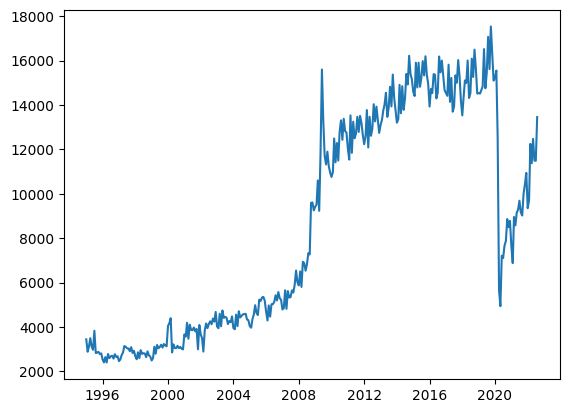

In [13]:
plt.plot(pm)
plt.show()

## 2. Comenta acerca de si se observa cierta estacionalidad en la serie, en que meses aumenta la variable ¿por qué?, en qué meses disminuye la variable ¿por qué? 8hay efecto estaciona)

#### Parece haber estacionalidad en los meses de julio y agosto, en julio baja debido a las vacaciones y en agosto sube por el regreso a clase
#### Parece aumentar la cantidad de pasajeros en el metro constantemente desde Noviembre del 2008 hasta mayo del 2019, eso debido a la ampliación de la linea 2 del metro que comunicaba desde General Anaya hasta sendero, facilitando la ida de alumnos a la UANL
#### Disminuye en Mayo del 2020 hasta julio del mismo año, debido al inicio de la pandemia, apartir de julio del 2020 empezo a subir de nuevo constantemente hasta la actualidad.
#### No parece haber efecto estacional segun su gráfica

## 3. Uno los propósitos fundamentales del análisis de series de tiempo es el pronóstico, es decir, “anticipar valores futuros de la variable”. Comenta para quién es importante conocer el pronostico de la serie de tiempo que analizaras y por qué es importante conocer el pronóstico de dicha serie de tiempo.

#### El pronostico de esta serie de tiempo es importante para la secretaria de comunicaciones y transportes, es importante que ellos sepan esta infomación porque puede que en un futuro, se pronostique que sera mucha gente la que usa el metro en Monterrey, por lo tanto habran problemas en la movilidad de las personas afectando sus trabajos o la escuela, la secretaria sabiendo esto podria hacer planes de acción para evitar la congestión de personas en el metro en el futuro.

#### 4. Añade las estadísticas descriptivas de la serie de tiempo (guíate de la notebook del análisis de las acciones de waltmart)

In [19]:
media = pm['pasajeros'].mean()
print(f'La media de los pasajeros que usan el metro por mes en Monterrey es de',media)

La media de los pasajeros que usan el metro por mes en Monterrey es de 8549.012048192772


In [20]:
desviacion = pm['pasajeros'].std()
print(f'La desviacion de los pasajeros que usan el metro por mes en Monterrey es de',desviacion)

La desviacion de los pasajeros que usan el metro por mes en Monterrey es de 4969.397571478796


In [25]:
maximo = pm['pasajeros'].max()
print(f'El maximo de los pasajeros que usan el metro por mes en Monterrey es de',maximo)

El maximo de los pasajeros que usan el metro por mes en Monterrey es de 17535


In [26]:
minimo = pm['pasajeros'].min()
print(f'El minimo de los pasajeros que usan el metro por mes en Monterrey es de',minimo)

El minimo de los pasajeros que usan el metro por mes en Monterrey es de 2397


## 5. Para ver mejor el comportamiento de la variable aplica un promedio móvil (3-6 meses)

In [26]:
pm['3-SMA'] = pm['pasajeros'].rolling(window=3).mean()
pm['6-SMA'] = pm['pasajeros'].rolling(window=6).mean()

In [27]:
pm['6-SMA']

fecha
1995-01-01             NaN
1995-02-01             NaN
1995-03-01             NaN
1995-04-01             NaN
1995-05-01             NaN
                  ...     
2022-04-01    10675.333333
2022-05-01    11015.500000
2022-06-01    11107.666667
2022-07-01    11463.666667
2022-08-01    12087.000000
Freq: MS, Name: 6-SMA, Length: 332, dtype: float64

In [28]:
pm['3-SMA']

fecha
1995-01-01             NaN
1995-02-01             NaN
1995-03-01     3140.333333
1995-04-01     3157.666667
1995-05-01     3234.333333
                  ...     
2022-04-01    11111.333333
2022-05-01    12030.666667
2022-06-01    11779.666667
2022-07-01    11816.000000
2022-08-01    12143.333333
Freq: MS, Name: 3-SMA, Length: 332, dtype: float64

In [8]:
pm.head(10)

,pasajeros,3-SMA,6-SMA
fecha,,,
1995-01-01,3439,NaN,NaN
1995-02-01,2879,NaN,NaN
1995-03-01,3103,3140.333333,NaN
1995-04-01,3491,3157.666667,NaN
1995-05-01,3109,3234.333333,NaN
1995-06-01,2966,3188.666667,3164.500000
1995-07-01,3826,3300.333333,3229.000000
1995-08-01,2822,3204.666667,3219.500000
1995-09-01,2840,3162.666667,3175.666667


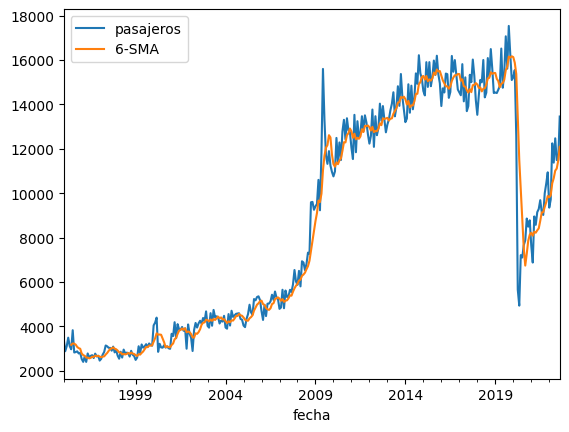

In [29]:
pm[['pasajeros', '6-SMA']].plot()
plt.show()

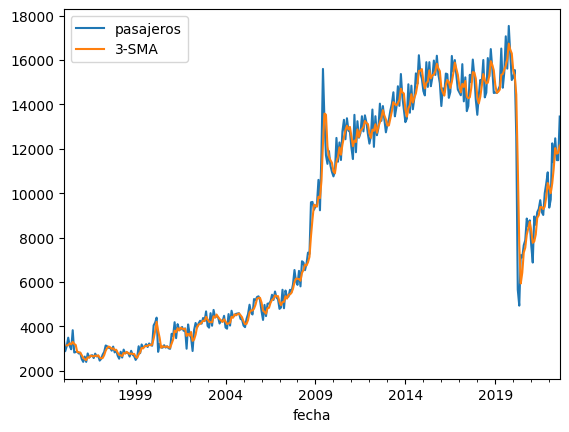

In [30]:
pm[['pasajeros', '3-SMA']].plot()
plt.show()

## 6. Utiliza la descomposición estacional, para obtener el componente estacional, y la serie desestacionalizada.

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose(pm['pasajeros'], model='mul')

In [36]:
pm_d = pm['pasajeros']/resultado.seasonal

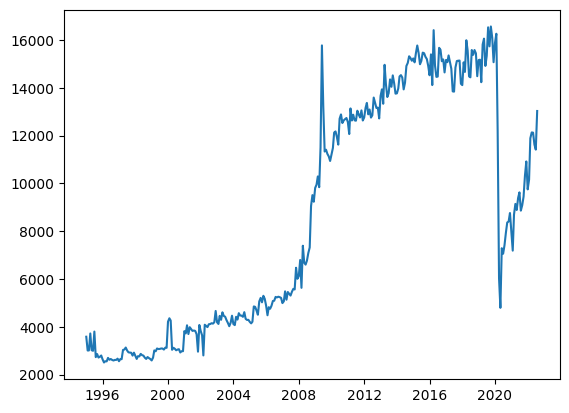

In [39]:
plt.plot(pm_d)
plt.show()


## 7. Utiliza la serie desestacionalizada para hacer el análisis ARIMA
## 8. Realiza una prueba de raíz unitaria para verificar si este proceso es estacionario (sino es estacionario conviértelo en estacionario)

In [33]:
resultado_adf = adfuller(pm_d)

In [34]:
alpha = .05
if resultado_adf[1]<alpha:
    print(f'La serie es estacionaria, con p-value{resultado_adf[1]}')
else:
    print(f'La serie es no estacionaria, con p-value{resultado_adf[1]}')

La serie es no estacionaria, con p-value0.6722241481974911


#### Como la serie resultó no ser estacionaria, la volveremos estacionaria.

In [21]:
pm_d_difer = pm_d.diff()

In [22]:
resultado_adf = adfuller(pm_d_difer.dropna())

alpha=0.05
if resultado_adf[1] < alpha:
    print(f'Se rechaza Ho, la serie es estacionaria, con p-value{resultado_adf[1]}')
else:
    print(f'No se rechaza Ho, la serie es no estacionaria, con p-value{resultado_adf[1]}')

Se rechaza Ho, la serie es estacionaria, con p-value8.631054085441435e-29


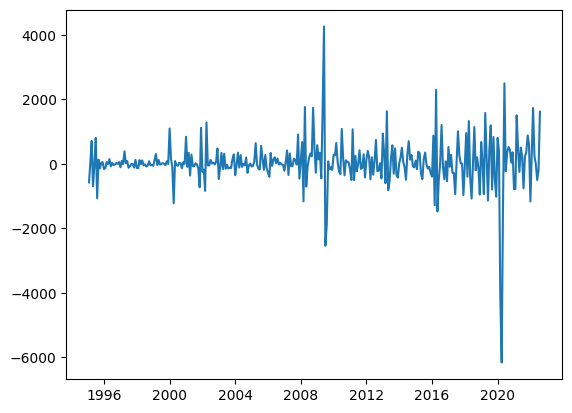

In [23]:
plt.plot(pm_d_difer)
plt.show()

#### Como resultó ser estacionario, procedemos a hacer lo siguiente

## 9. Con el proceso estacionario, realiza las gráficas de autocorrelación (ACF) y autocorrelación parcial (PACF) y señala como se interpretan y ¿qué tipo de proceso es tu serie de tiempo AR(p), MA(q) o ARMA(p,q)?

C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


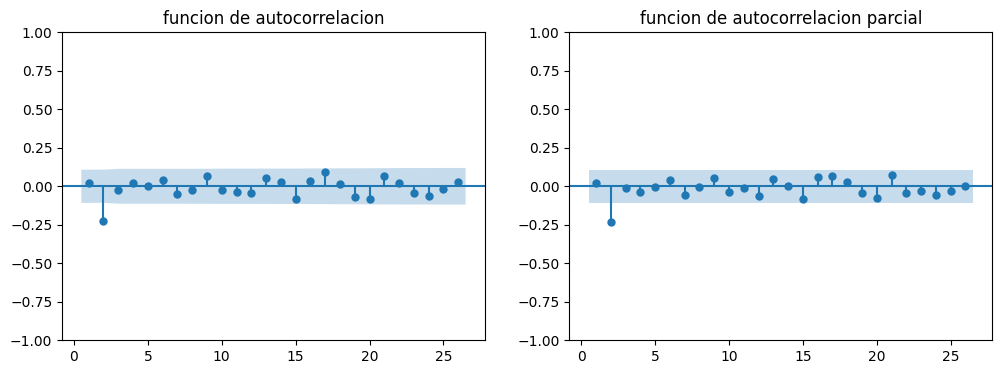

In [44]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

plot_acf(pm_d_difer.dropna(), zero=False, ax= ax[0], title='funcion de autocorrelacion')
ax[0].set_ylim(-1,1)

plot_pacf(pm_d_difer.dropna(), zero=False, ax= ax[1], title='funcion de autocorrelacion parcial')
ax[1].set_ylim(-1,1)

plt.show()

#### Recordando que el ACF se utliza para identificar el MA(q), podemos decir que la segunda barra es significativa con un 95% de confianza, al igual que el PACF

#### Parece ser un MA(2), AR(2), ARMA(2,2)

## 10.Utilizando el código de ejemplo para probar distintas combinaciones del modelo, prueba varias combinaciones y elige un criterio para seleccionar el modelo, ya sea el criterio de akaike (AIC) o el criterio bayesiano de información (BIC)

In [45]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [46]:
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(pm_d_difer, order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 5


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 6


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 2
AR: 3, MA: 3


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 4


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 5


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 6


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as

AR: 4, MA: 3


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 4


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 5


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 6


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as

AR: 5, MA: 3


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 4


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 6


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 3


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 4


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 5


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 6


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC          BIC
AR MA                          
0  0   5312.959691  5320.569961
   1   5314.663184  5326.078588
   2   5299.084309  5314.304849
   3   5300.825194  5319.850869
   4   5302.468620  5325.299430
   5   5304.469713  5331.105658
   6   5306.370758  5336.811837
1  0   5314.797511  5326.212916
   1   5311.484109  5326.704649
   2   5300.852408  5319.878083
   3   5302.322401  5325.153211
   4   5304.220399  5330.856344
   5   5306.343192  5336.784272
   6   5308.305088  5342.551303
2  0   5298.842313  5314.062853
   1   5300.765632  5319.791307
   2   5302.498364  5325.329174
   3   5304.857718  5331.493663
   4   5297.193637  5327.634717
   5   5299.475373  5333.721588
   6   5299.150131  5337.201481
3  0   5300.788207  5319.813882
   1   5300.713716  5323.544525
   2   5304.490206  5331.126150
   3   5302.953081  5333.394160
   4   5299.216834  5333.463049
   5   5300.276318  5338.327667
   6   5301.741761  5343.598245
4  0   5302.430138  5325.260948
   1   5304.432271  5331.068216
   2   5295.462987  5325.904067
   3   5299.314610  5333.560825
   4   5305.606313  5343.657663
   5   5306.112601  5347.969086
   6   5303.741245  5349.402865
5  0   5304.423380  5331.059325
   1   5306.143394  5336.584473
   2   5299.147550  5333.393765
   3   5300.937288  5338.988638
   4   5305.066621  5346.923106
   5   5307.642498  5353.304117
   6   5303.516776  5352.983530
6  0   5305.934944  5336.376024
   1   5307.546643  5341.792858
   2   5300.660090  5338.711440
   3   5302.372377  5344.228861
   4   5305.270558  5350.932178
   5   5307.592615  5357.059370
   6   5303.294256  5356.566146

In [47]:
ic.sort_values('BIC', ascending = True)

,,AIC,BIC
AR,MA,,
2,0,5298.842313,5314.062853
0,2,5299.084309,5314.304849
2,1,5300.765632,5319.791307
3,0,5300.788207,5319.813882
0,3,5300.825194,5319.850869
1,2,5300.852408,5319.878083
0,0,5312.959691,5320.569961
3,1,5300.713716,5323.544525
1,3,5302.322401,5325.153211


In [48]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
4  2   5295.462987  5325.904067
2  4   5297.193637  5327.634717
   0   5298.842313  5314.062853
0  2   5299.084309  5314.304849
5  2   5299.147550  5333.393765
2  6   5299.150131  5337.201481
3  4   5299.216834  5333.463049
4  3   5299.314610  5333.560825
2  5   5299.475373  5333.721588
3  5   5300.276318  5338.327667
6  2   5300.660090  5338.711440
3  1   5300.713716  5323.544525
2  1   5300.765632  5319.791307
3  0   5300.788207  5319.813882
0  3   5300.825194  5319.850869
1  2   5300.852408  5319.878083
5  3   5300.937288  5338.988638
3  6   5301.741761  5343.598245
1  3   5302.322401  5325.153211
6  3   5302.372377  5344.228861
4  0   5302.430138  5325.260948
0  4   5302.468620  5325.299430
2  2   5302.498364  5325.329174
3  3   5302.953081  5333.394160
6  6   5303.294256  5356.566146
5  6   5303.516776  5352.983530
4  6   5303.741245  5349.402865
1  4   5304.220399  5330.856344
5  0   5304.423380  5331.059325
4  1   5304.432271  5331.068216
0  5   5304.469713  5331.105658
3  2   5304.490206  5331.126150
2  3   5304.857718  5331.493663
5  4   5305.066621  5346.923106
6  4   5305.270558  5350.932178
4  4   5305.606313  5343.657663
6  0   5305.934944  5336.376024
4  5   5306.112601  5347.969086
5  1   5306.143394  5336.584473
1  5   5306.343192  5336.784272
0  6   5306.370758  5336.811837
6  1   5307.546643  5341.792858
   5   5307.592615  5357.059370
5  5   5307.642498  5353.304117
1  6   5308.305088  5342.551303
   1   5311.484109  5326.704649
0  0   5312.959691  5320.569961
   1   5314.663184  5326.078588
1  0   5314.797511  5326.212916

### La mejor opcion segun BIC, es AR(2), por lo tanto, fue correcta nuestra suposicion.

## 11. Estima el modelo ARMA que hayas elegido e interpreta los coeficientes

In [62]:
modelo = ARIMA(pm_d_difer, order=(2, 0, 0))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  332
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2645.421
Date:                Thu, 24 Nov 2022   AIC                           5298.842
Time:                        22:36:10   BIC                           5314.063
Sample:                    01-01-1995   HQIC                          5304.912
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5296     35.081      0.813      0.416     -40.228      97.287
ar.L1          0.0278      0.023      1.189      0.235      -0.018       0.074
ar.L2         -0.2310      0.039     -5.942      0.000      -0.307      -0.155
sigma2      5.141e+05   1.74e+04     29.515      0.000     4.8e+05    5.48e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5780.62
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               7.75   Skew:                            -1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Los coeficientes son de la formula: $Y_t = 28.53 + 0.03Y_{t-1} - 0.2310Y_{t-2} + \varepsilon_t $

## 12.¿qué modelo se debería estimar según AIC?


#### Según AIC, el modelo que se debería estima es un ARMA(4,2)

## 13.¿Qué modelo se debe estimar según BIC?

#### Segín BIC, el modelo que se debería estimar es un AR(2)

## 14.Utiliza el modelo estimado para hacer pronósticos, y pronóstica uno, dos, tres, cuatro y cinco periodos. Recuerda que el pronóstico tiene que estar en la escala de la variable original. 

In [63]:
modelo2 = ARIMA(pm['pasajeros'], order=(2, 1, 0))
resultado2 = modelo2.fit()
resultado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              pasajeros   No. Observations:                  332
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2709.114
Date:                Thu, 24 Nov 2022   AIC                           5424.228
Time:                        22:36:18   BIC                           5435.634
Sample:                    01-01-1995   HQIC                          5428.777
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2246      0.035     -6.491      0.000      -0.292      -0.157
ar.L2         -0.0981      0.039     -2.547      0.011      -0.174      -0.023
sigma2      7.568e+05   2.86e+04     26.425      0.000    7.01e+05    8.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4890.36
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              11.85   Skew:                            -1.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
pm['pronostico'] = resultado2.predict()
pm['pronostico'][0] = pm['pasajeros'][0]

C:\Users\Elías\AppData\Local\Temp\ipykernel_16440\2696213756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm['pronostico'][0] = pm['pasajeros'][0]


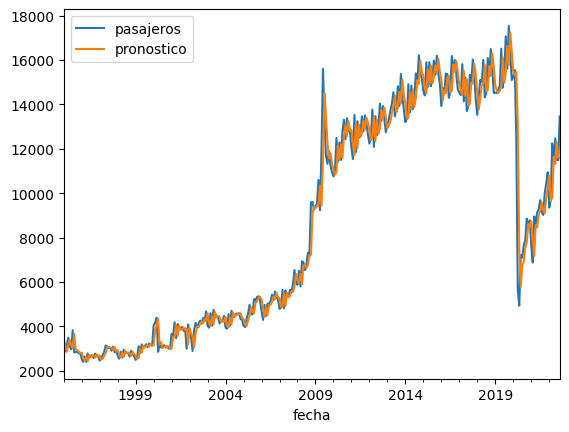

In [65]:
pm[['pasajeros', 'pronostico']].plot()
plt.show()

In [61]:
len(pm)

332

In [67]:
resultado2.predict(332, 336)

2022-09-01    13011.738287
2022-10-01    12917.695935
2022-11-01    12982.119274
2022-12-01    12976.881008
2023-01-01    12971.734982
Freq: MS, Name: predicted_mean, dtype: float64

#### No es conveniente usar un modelo AR(2) para pronosticar a futuro lejano. Según mi pronostico para los siguientes 5 meses, se mantiene entre los 12900 y 13100 pasajeros al mes 